In [1]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv('wine data.csv')

In [4]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [5]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

print("There are {} types of wine in this dataset such as {}... \n".format(len(df.variety.unique()),
                                                                           ", ".join(df.variety.unique()[0:5])))

print("There are {} countries producing wine in this dataset such as {}... \n".format(len(df.country.unique()),
                                                                                      ", ".join(df.country.unique()[0:5])))


There are 150930 observations and 11 features in this dataset. 

There are 632 types of wine in this dataset such as Cabernet Sauvignon, Tinta de Toro, Sauvignon Blanc, Pinot Noir, Provence red blend... 

There are 49 countries producing wine in this dataset such as US, Spain, France, Italy, New Zealand... 



In [6]:
df[["country", "description","points"]].head()

,country,description,points
0,US,This tremendous 100% varietal wine hails from ...,96
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",96
2,US,Mac Watson honors the memory of a wine once ma...,96
3,US,"This spent 20 months in 30% new French oak, an...",96
4,France,"This is the top wine from La Bégude, named aft...",95


In [7]:
# Groupby by country
country = df.groupby("country")

In [8]:

# Summary statistic of all countries
country.describe().head()

Unnamed: 0                                      \
                            count          mean           std     min   
country                                                                 
Albania                       2.0   4753.000000    156.977705  4642.0   
Argentina                  5631.0  80834.275617  41920.827687    60.0   
Australia                  4957.0  90585.526932  43326.188557    61.0   
Austria                    3057.0  70144.829899  44432.186559   582.0   
Bosnia and Herzegovina        4.0  56937.750000  41678.036193  7520.0   

                                                               points  \
                             25%      50%       75%       max   count   
country                                                                 
Albania                  4697.50   4753.0    4808.5    4864.0     2.0   
Argentina               46176.50  83505.0  117693.5  149638.0  5631.0   
Australia               57427.00  99866.0  129221.0  150854.0  4957.0   
Austria                 29105.00  66552.0  109441.0  149531.0  3057.0   
Bosnia and Herzegovina  29872.25  63944.0   91009.5   92343.0     4.0   

                                   ...                 price             \
                             mean  ...    75%    max   count       mean   
country                            ...                                    
Albania                 88.000000  ...  88.00   88.0     2.0  20.000000   
Argentina               85.996093  ...  88.00   97.0  5587.0  20.794881   
Australia               87.892475  ...  90.00  100.0  4894.0  31.258480   
Austria                 89.276742  ...  91.00   98.0  2483.0  31.192106   
Bosnia and Herzegovina  84.750000  ...  85.75   88.0     4.0  12.750000   

                                                                    
                              std   min    25%   50%   75%     max  
country                                                             
Albania                  0.000000  20.0  20.00  20.0  20.0    20.0  
Argentina               20.186540   4.0  11.00  15.0  20.0   250.0  
Australia               39.008512   5.0  15.00  20.0  34.0   850.0  
Austria                 28.540861   8.0  18.00  25.0  38.0  1100.0  
Bosnia and Herzegovina   0.500000  12.0  12.75  13.0  13.0    13.0  

[5 rows x 24 columns]

In [9]:

country.mean().sort_values(by="points",ascending=False).head()

,Unnamed: 0,points,price
country,,,
England,29927.333333,92.888889,47.500000
Austria,70144.829899,89.276742,31.192106
France,70899.148734,88.925870,45.619885
Germany,65515.593801,88.626427,39.011078
Italy,71813.179700,88.413664,37.547913


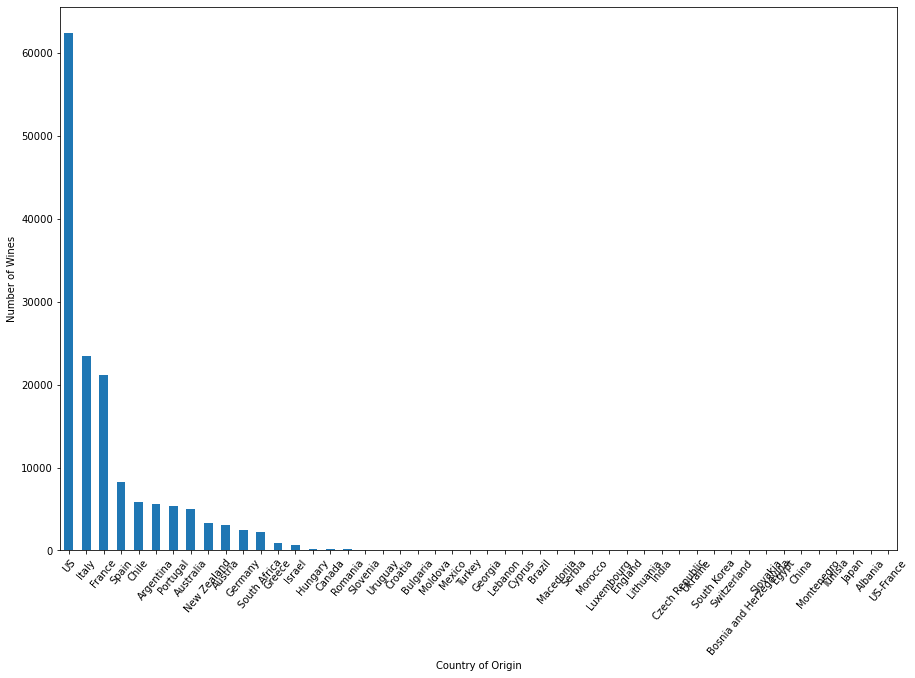

In [10]:
plt.figure(figsize=(15,10))
country.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Number of Wines")
plt.show()

In [12]:
# Start with one review:
text = df.description[0]

In [13]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

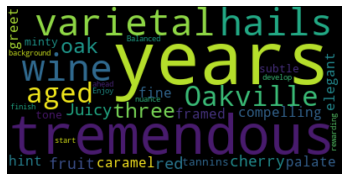

In [14]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

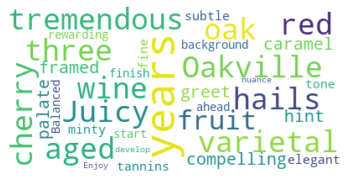

In [15]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()